**Outliers**

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
os.chdir("D:/Python/1. Nivel I/9/datos")

In [3]:
df = pd.read_csv("data_credit.csv",
                sep=",",
                encoding="ISO-8859-1")

**¿Por qué trabajar en el tratamiento de valores atípicos?**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

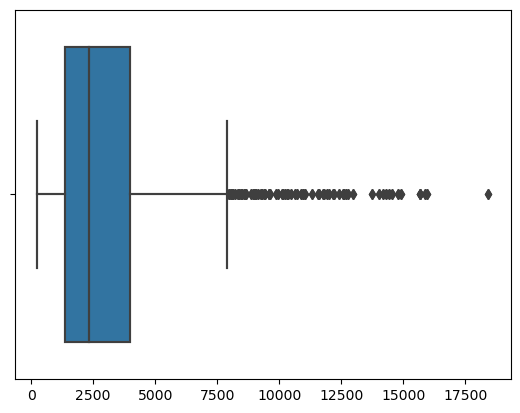

In [6]:
sns.boxplot(x=df.camt.values)
plt.show()

**Conclusión**: existe la presencia de valores atípicos y la variable tiene una distribución asimétrica

**IQR Score**

Identifica los valores atípicos basado en el rango intercuartílico

In [7]:
Q1 = df["camt"].quantile(0.25);print(Q1)

1365.5


In [8]:
Q2 = df["camt"].quantile(0.5);print(Q2)

2319.5


In [9]:
Q3 = df["camt"].quantile(0.75);print(Q3)

3972.25


In [10]:
Q3-Q2

1652.75

In [11]:
Q2-Q1

954.0

In [12]:
IQR = Q3- Q1; print(IQR)

2606.75


In [15]:
sum(df.camt.values<(Q1 -(1.5*IQR)))

0

In [16]:
sum(df.camt.values>(Q3 +(1.5*IQR)))

72

In [17]:
selection = (df.camt.values<(Q1 -(1.5*IQR))) | (df.camt.values>(Q3 +(1.5*IQR)))

In [19]:
df_out_iqr=df.iloc[selection,]

In [24]:
round(len(df_out_iqr)/len(df)*100,1)

7.2

In [25]:
df_out_iqr

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab,customer
5,36.0,3.0,7.0,9055.0,0.0,2.0,2.0,3.0,4.0,4.0,35.0,3.0,1.0,2.0,2.0,1.0
17,30.0,1.0,10.0,8072.0,1.0,1.0,2.0,3.0,3.0,3.0,25.0,2.0,3.0,3.0,1.0,1.0
18,24.0,3.0,2.0,12579.0,0.0,4.0,4.0,2.0,2.0,4.0,44.0,3.0,1.0,4.0,1.0,2.0
57,36.0,5.0,4.0,9566.0,1.0,2.0,2.0,2.0,2.0,3.0,31.0,2.0,2.0,3.0,1.0,1.0
63,48.0,1.0,10.0,14421.0,0.0,2.0,2.0,3.0,2.0,3.0,25.0,2.0,1.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,48.0,3.0,2.0,10297.0,0.0,3.0,4.0,3.0,4.0,4.0,39.0,3.0,3.0,3.0,2.0,2.0
945,48.0,1.0,1.0,8358.0,1.0,1.0,1.0,2.0,1.0,3.0,30.0,2.0,2.0,3.0,1.0,1.0
953,36.0,3.0,3.0,10974.0,0.0,5.0,4.0,2.0,2.0,3.0,26.0,2.0,2.0,4.0,1.0,2.0
980,30.0,5.0,3.0,8386.0,1.0,3.0,2.0,3.0,2.0,2.0,49.0,2.0,1.0,3.0,1.0,2.0


**Z score**

In [26]:
from scipy import stats 
import numpy as np

In [30]:
zscore=np.abs(stats.zscore(df.camt.values))

In [32]:
k=3 #criterio estándar

In [34]:
np.where(zscore>=k)[0]

array([ 18,  63,  87,  95, 105, 236, 272, 274, 373, 374, 378, 381, 395,
       563, 615, 637, 714, 744, 763, 818, 832, 887, 915, 917, 921],
      dtype=int64)

In [35]:
df_out_zscore = df.iloc[np.where(zscore>=k)[0],:]

In [38]:
len(df_out_zscore)

25

**Transformación**

**transformación softMax**

In [41]:
import statistics as sts

In [43]:
camt_softmax = 1/(1+(np.exp(-(df.camt.values - df.iloc[:,3].mean())/sts.stdev(df.iloc[:,3]))))

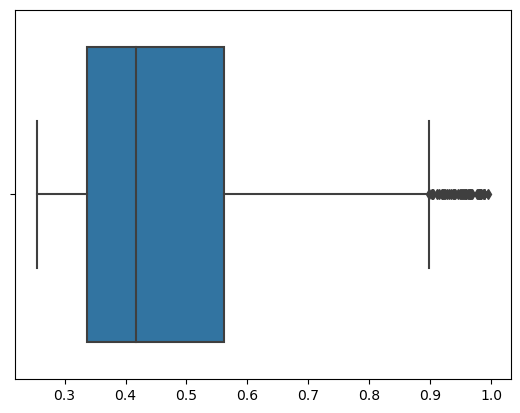

In [45]:
sns.boxplot(x=camt_softmax)
plt.show()

In [46]:
df["camt_softmax"]=camt_softmax

In [47]:
Q1 = df["camt_softmax"].quantile(0.25);print(Q1)
Q3 = df["camt_softmax"].quantile(0.75);print(Q3)
IQR = Q3- Q1; print(IQR)

0.3373456477743716
0.5617673110847272
0.22442166331035562


In [48]:
selection = (df.camt_softmax.values<(Q1 -(1.5*IQR))) | (df.camt_softmax.values>(Q3 +(1.5*IQR)))

In [50]:
len(df.iloc[selection,:])

46

**transformación logaritmica**

In [52]:
camt_log = np.log(df.camt.values)

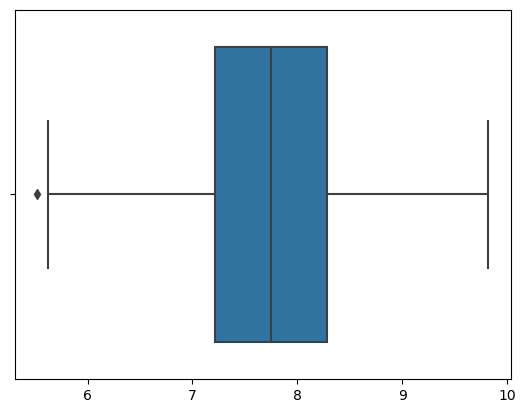

In [53]:
sns.boxplot(x=camt_log)
plt.show()

In [54]:
df["camt_log"]=camt_log

In [55]:
Q1 = df["camt_log"].quantile(0.25);print(Q1)
Q3 = df["camt_log"].quantile(0.75);print(Q3)
IQR = Q3- Q1; print(IQR)

7.219275739698904
8.287087957827445
1.0678122181285419


In [56]:
selection = (df.camt_log.values<(Q1 -(1.5*IQR))) | (df.camt_log.values>(Q3 +(1.5*IQR)))

In [59]:
len(df.iloc[selection,:])/len(df)*100

0.1

**Nota**: el número de valores atípicos es menor al 1% es poco significativo, podemos eliminarlo.

**Modelos no supervisados**

- Modelo no supervisados no contamos con una variable objetivo.

- Objetivo: identificar subpoblaciones homogéneas en el comportamiento de los datos.

**K-means**

In [60]:
dicc = {"ingreso":[1800, 3000, 4000, 950, 5000],
       "experiencia":[24, 38,50,9,65]}

In [61]:
import pandas as pd

In [62]:
data = pd.DataFrame(dicc)

In [63]:
data

,ingreso,experiencia
0,1800,24
1,3000,38
2,4000,50
3,950,9
4,5000,65


**Paso 1**: un análisis exploratorio

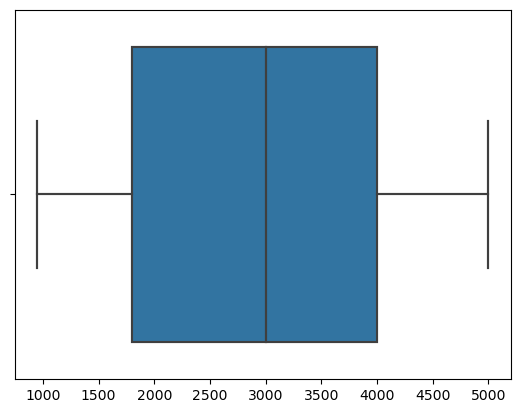

In [65]:
sns.boxplot(x=data.ingreso.values)
plt.show()

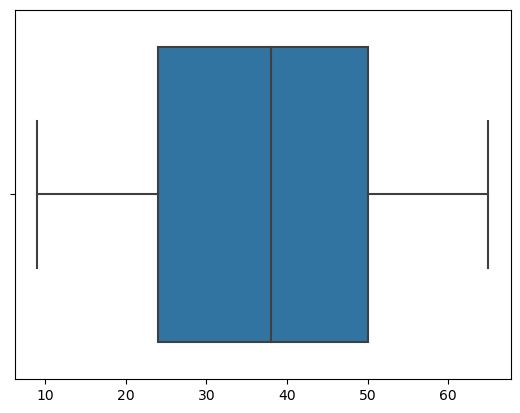

In [66]:
sns.boxplot(x=data.experiencia.values)
plt.show()

**Paso 2**: escalamiento de los datos

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()

In [69]:
x_s = sc.fit_transform(data)

In [70]:
x_s

array([[-0.78870794, -0.67593722],
       [ 0.03429165,  0.04096589],
       [ 0.72012464,  0.65545427],
       [-1.37166597, -1.4440477 ],
       [ 1.40595762,  1.42356475]])

**Paso 3**: representación gráfica de las observaciones

In [71]:
import matplotlib.pyplot as plt

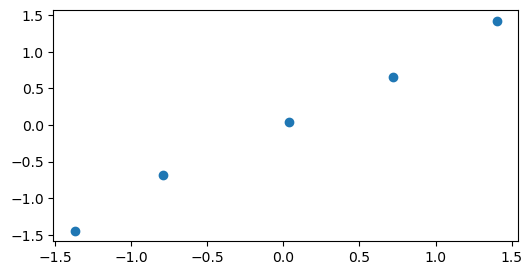

In [72]:
fig, ax= plt.subplots(figsize=(6,3))
ax.scatter(x_s[:,0],x_s[:,1])
plt.show()

**Paso 3**: identificar el número óptimo de k-grupos

In [74]:
from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.cluster import KMeans

- silhouette_score(): función para determinar el número óptimo de grupos por el coeficiente de silueta.
- euclidean_distances(): función para calcular la distancia de las observaciones a los centros.
- KMeans(): función para aplicar el algoritmo de k-means.

<center><img src="https://miro.medium.com/max/963/1*Qu9vtRFFrQ1_4jj4Nu__BQ.jpeg" width="700"></center>

In [75]:
sil = []

In [76]:
for i in range(2,5):
    kmeans = KMeans(n_clusters=i,#número de cluster
                   init="k-means++",#kmeans
                   max_iter=300, #número máximo de iteraciones para la asignación de centros inici
                   n_init=1000,#número de iteraciones
                   random_state=2023)#semilla
    sil.append(silhouette_score(x_s,kmeans.fit_predict(x_s)))

In [77]:
sil

[0.4954871475196946, 0.30242767297244233, 0.05241133218529063]

**Observación**: se selecciona el valor de "k" donde se muestre el mayor valor de silueta (cercano a 1)

**Paso 4**: aplicación de k-means

In [78]:
kmeans = KMeans(n_clusters=2,#número de cluster
                   init="k-means++",#kmeans
                   max_iter=300, #número máximo de iteraciones para la asignación de centros inici
                   n_init=1000,#número de iteraciones
                   random_state=2023)#semilla

In [80]:
y_km= kmeans.fit_predict(x_s) +1

In [81]:
y_km

array([2, 1, 1, 2, 1])

In [83]:
data["cluster kmeans"]=y_km

In [84]:
data

,ingreso,experiencia,cluster kmeans
0,1800,24,2
1,3000,38,1
2,4000,50,1
3,950,9,2
4,5000,65,1


**Paso 5**: refinamiento

**Nota**: retirar las variables que no contribuyen en el proceso de segmentación

In [85]:
data.groupby(["cluster kmeans"]).mean().round(1)

,ingreso,experiencia
cluster kmeans,,
1,4000.0,51.0
2,1375.0,16.5
